## Communication Cost

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import torch
import torch.nn as nn
from torchvision import models
from CLIENT1.KD_0.resnet import resnet10
from torchsummary import summary

#model = resnet10()
#model = models.resnet34(pretrained=True)
#input_features = model.fc.in_features
#model.fc = nn.Linear(input_features, 2)
model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 2)
summary(model, (3, 224, 224))

modified_model = nn.Sequential(*list(model.children())[:-1])
summary(modified_model, (3, 224, 224))

## Computational Cost

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
import torch
import torch.nn as nn
from torchvision import models
from CLIENT1.KD_0.resnet import resnet10
from thop import profile

#model = resnet10()
#model = models.resnet34(pretrained=True)
#input_features = model.fc.in_features
#model.fc = nn.Linear(input_features, 2)
model = models.densenet121(pretrained=True)
model.classifier = nn.Linear(model.classifier.in_features, 2)

input = torch.randn(32, 3, 224, 224)
flops, params = profile(model, inputs=(input,))
print(f"FLOPs: {flops}")
print(f"Params: {params}")

## Local Client Performance

1602
*************Metrics******************
Melanoma: 0.5849056601934259, Melanocytic nevus: 0.8589371979846439, Basal cell carcinoma: 0.5087719289319791, Actinic keratosis: 0.5319148924852874, Benign keratosis: 0.3984374996887207, Dermatofibroma: 0.11111110987654321, Vascular lesion: 0.0, Squamous cell carcinoma: 0.19999999600000007
test accuracy 0.7378 - test f1_micro 0.7378 - test f1_weighted 0.7414


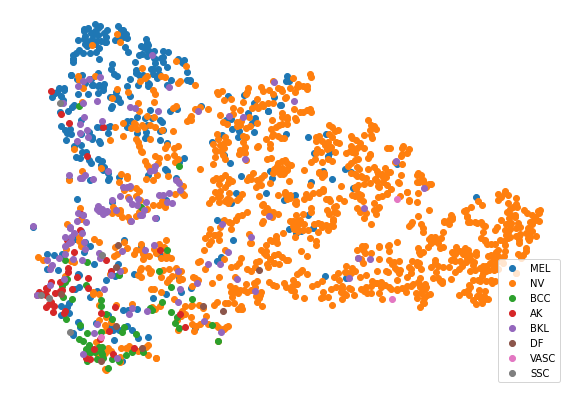

In [4]:
%run CLIENT4/KD_0/test_tSNE.py